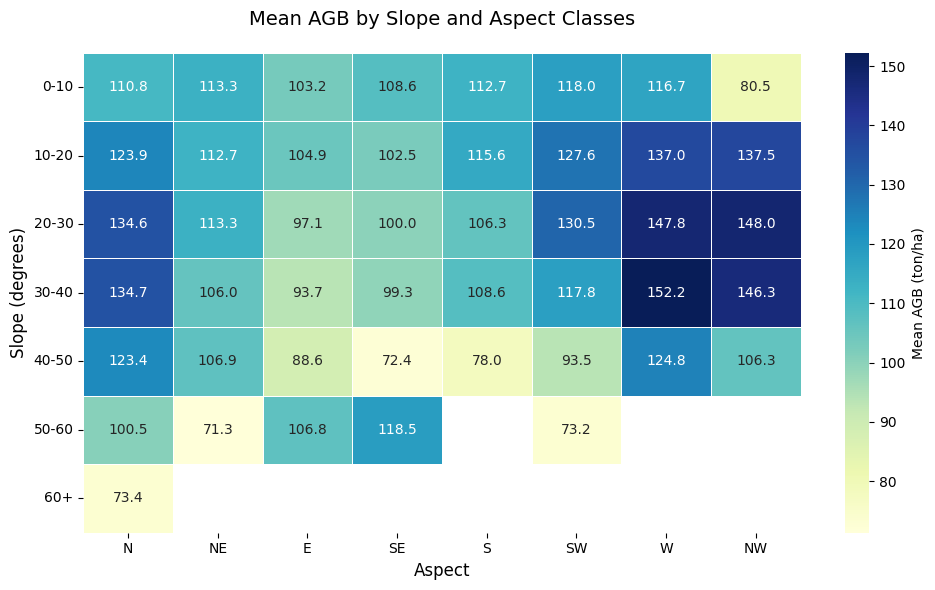

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

with rasterio.open(r'F:\AGB') as src_agb:
    agb = src_agb.read(1).astype(np.float32)
    nodata_agb = src_agb.nodata

with rasterio.open(r'F:\slope') as src_slope:
    slope = src_slope.read(1).astype(np.float32)
    nodata_slope = src_slope.nodata

with rasterio.open(r'F:\Aspect') as src_aspect:
    aspect = src_aspect.read(1).astype(np.float32)
    nodata_aspect = src_aspect.nodata


if nodata_agb is not None:
    agb[agb == nodata_agb] = np.nan
if nodata_slope is not None:
    slope[slope == nodata_slope] = np.nan
if nodata_aspect is not None:
    aspect[aspect == nodata_aspect] = np.nan

slope_bins = [0, 10, 20, 30, 40, 50, 60]
slope_classes = np.digitize(slope, bins=slope_bins)
slope_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60+']

aspect_bins = [22.5, 67.5, 112.5, 157.5, 202.5, 247.5, 292.5, 337.5]  # مرزهای کلاس
aspect_class = np.digitize(aspect, bins=aspect_bins)

aspect_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']

data_matrix = np.zeros((len(slope_labels), len(aspect_labels))) * np.nan
count_matrix = np.zeros((len(slope_labels), len(aspect_labels)))

rows, cols = agb.shape
for i in range(rows):
    for j in range(cols):
        if np.isnan(agb[i, j]) or np.isnan(slope[i, j]) or np.isnan(aspect[i, j]):
            continue
        s_idx = slope_classes[i, j] - 1  
        a_idx = (aspect_class[i, j] - 1) % 

        if 0 <= s_idx < len(slope_labels) and 0 <= a_idx < len(aspect_labels):
            if np.isnan(data_matrix[s_idx, a_idx]):
                data_matrix[s_idx, a_idx] = 0
                count_matrix[s_idx, a_idx] = 0
            data_matrix[s_idx, a_idx] += agb[i, j]
            count_matrix[s_idx, a_idx] += 1


with np.errstate(invalid='ignore', divide='ignore'):
    mean_matrix = np.where(count_matrix > 0, data_matrix / count_matrix, np.nan)

plt.figure(figsize=(10, 6))
sns.heatmap(mean_matrix,
            annot=True,
            fmt=".1f",
            cmap="YlGnBu",
            xticklabels=aspect_labels,
            yticklabels=slope_labels,
            cbar_kws={'label': 'Mean AGB (ton/ha)'},
            square=False,
            linewidths=.5,
            annot_kws={"size": 10})

plt.title('Mean AGB by Slope and Aspect Classes', fontsize=14, pad=20)
plt.xlabel('Aspect', fontsize=12)
plt.ylabel('Slope (degrees)', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()